# Introduction

It's always hard to find the perfect employee. But to keep him happy and satisfied it's a harder task. Any company invests so much time and money to hire, to teach and to keep an employee. Therefore turn to our predictive modeling capabilities and see if we can predict employee attrition on this synthetically generated IBM dataset.
And on the other hand, knowing what factors can possibly to make you unhappy with your job will help you with finding another one.

This notebook is structured as follows:

- Exploratory Data Analysis: In this section, we explore the dataset by taking a look at the feature distributions, how correlated one feature is to the other and create some Seaborn visualizations.
- Feature Engineering and Categorical Encoding: Conduct some feature engineering as well as encode all our categorical features into dummy variables
- Implementing Machine Learning models: We implement a few models and after that, focusing on Type II error, we look at feature importances from this model.

In [399]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn import svm, datasets
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [400]:
dataset = pd.read_csv('Desktop/Thinkful/WA_Fn-UseC_-HR-Employee-Attrition.csv')

Now that we have our data imported into Pandas, we can check out the first few rows of our dataframe.

#### Data Descriptions

In [401]:
dataset.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [402]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## Checking for missing values

In [403]:
dataset.isnull().sum()*100/dataset.isnull().count()

Age                         0.0
Attrition                   0.0
BusinessTravel              0.0
DailyRate                   0.0
Department                  0.0
DistanceFromHome            0.0
Education                   0.0
EducationField              0.0
EmployeeCount               0.0
EmployeeNumber              0.0
EnvironmentSatisfaction     0.0
Gender                      0.0
HourlyRate                  0.0
JobInvolvement              0.0
JobLevel                    0.0
JobRole                     0.0
JobSatisfaction             0.0
MaritalStatus               0.0
MonthlyIncome               0.0
MonthlyRate                 0.0
NumCompaniesWorked          0.0
Over18                      0.0
OverTime                    0.0
PercentSalaryHike           0.0
PerformanceRating           0.0
RelationshipSatisfaction    0.0
StandardHours               0.0
StockOptionLevel            0.0
TotalWorkingYears           0.0
TrainingTimesLastYear       0.0
WorkLifeBalance             0.0
YearsAtC

So we got lucky and we don't have any missing values to deal with.

In [404]:
dataset.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [405]:
dataset.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Outliers

In [406]:
# Create List of Numeric Columns
numeric_columns = dataset.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print(f"The number of numerical columns is {len(numeric_columns)}")

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
The number of numerical columns is 26


In [407]:
for col in numeric_columns:
    q75, q25 = np.percentile(dataset[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} and it is {} percent.".format(col, len((np.where((dataset[col] > max_val) 
                      | (dataset[col] < min_val))[0])), len((np.where((dataset[col] > max_val) | 
                                                    (dataset[col] < min_val))[0]))*100/1987))
   

Number of outliers for Age is: 0 and it is 0.0 percent.
Number of outliers for DailyRate is: 0 and it is 0.0 percent.
Number of outliers for DistanceFromHome is: 0 and it is 0.0 percent.
Number of outliers for Education is: 0 and it is 0.0 percent.
Number of outliers for EmployeeCount is: 0 and it is 0.0 percent.
Number of outliers for EmployeeNumber is: 0 and it is 0.0 percent.
Number of outliers for EnvironmentSatisfaction is: 0 and it is 0.0 percent.
Number of outliers for HourlyRate is: 0 and it is 0.0 percent.
Number of outliers for JobInvolvement is: 0 and it is 0.0 percent.
Number of outliers for JobLevel is: 0 and it is 0.0 percent.
Number of outliers for JobSatisfaction is: 0 and it is 0.0 percent.
Number of outliers for MonthlyIncome is: 114 and it is 5.737292400603925 percent.
Number of outliers for MonthlyRate is: 0 and it is 0.0 percent.
Number of outliers for NumCompaniesWorked is: 52 and it is 2.6170105686965273 percent.
Number of outliers for PercentSalaryHike is: 0 and

MonthlyIncome, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYear, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager.

Text(0.5, 1.0, 'YearsWithCurrManager')

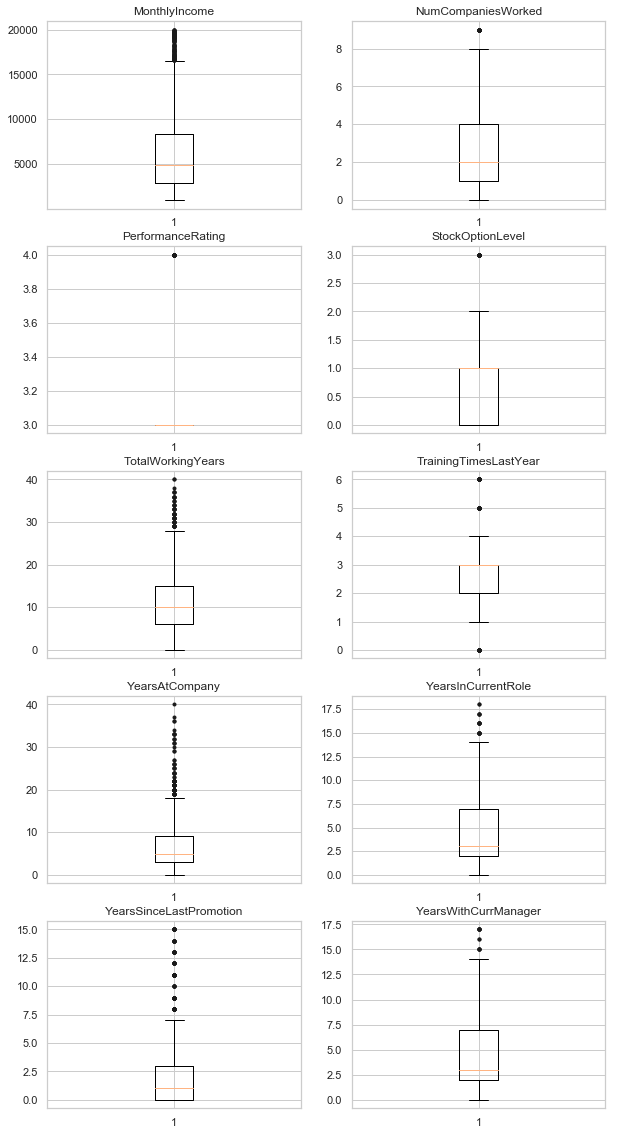

In [408]:
fig = plt.figure(figsize=(10,20))

plt.subplot(5, 2, 1)
plt.boxplot(dataset["MonthlyIncome"], sym='k.')
plt.title("MonthlyIncome")

plt.subplot(5, 2, 2)
plt.boxplot(dataset["NumCompaniesWorked"], sym='k.')
plt.title("NumCompaniesWorked")

plt.subplot(5, 2, 3)
plt.boxplot(dataset["PerformanceRating"], sym='k.')
plt.title("PerformanceRating")

plt.subplot(5, 2, 4)
plt.boxplot(dataset["StockOptionLevel"], sym='k.')
plt.title("StockOptionLevel")

plt.subplot(5, 2, 5)
plt.boxplot(dataset["TotalWorkingYears"], sym='k.')
plt.title("TotalWorkingYears")

plt.subplot(5, 2, 6)
plt.boxplot(dataset["TrainingTimesLastYear"], sym='k.')
plt.title("TrainingTimesLastYear")

plt.subplot(5, 2, 7)
plt.boxplot(dataset["YearsAtCompany"], sym='k.')
plt.title("YearsAtCompany")

plt.subplot(5, 2, 8)
plt.boxplot(dataset["YearsInCurrentRole"], sym='k.')
plt.title("YearsInCurrentRole")

plt.subplot(5, 2, 9)
plt.boxplot(dataset["YearsSinceLastPromotion"], sym='k.')
plt.title("YearsSinceLastPromotion")

plt.subplot(5, 2, 10)
plt.boxplot(dataset["YearsWithCurrManager"], sym='k.')
plt.title("YearsWithCurrManager")

In [409]:
dataset[['NumCompaniesWorked', 'Age', 'Attrition']].sort_values(by = 'NumCompaniesWorked')

,NumCompaniesWorked,Age,Attrition
791,0,35,Yes
217,0,29,Yes
223,0,38,No
224,0,31,No
940,0,39,Yes
941,0,30,No
944,0,28,No
949,0,39,No
1269,0,43,No
593,0,36,No


In [410]:
dataset.PerformanceRating.sort_values()

0       3
944     3
943     3
942     3
941     3
940     3
939     3
938     3
937     3
935     3
934     3
933     3
932     3
931     3
930     3
929     3
928     3
927     3
945     3
926     3
946     3
949     3
966     3
965     3
964     3
963     3
962     3
961     3
960     3
959     3
       ..
521     4
518     4
1193    4
861     4
517     4
1186    4
1185    4
1184    4
1183    4
1213    4
1320    4
211     4
533     4
177     4
178     4
817     4
180     4
182     4
553     4
1243    4
1239    4
545     4
194     4
834     4
537     4
205     4
1221    4
841     4
843     4
676     4
Name: PerformanceRating, Length: 1470, dtype: int64

In [411]:
dataset[['MonthlyIncome', 'JobRole', 'JobLevel']].sort_values(by = 'MonthlyIncome')

,MonthlyIncome,JobRole,JobLevel
513,1009,Research Scientist,1
727,1051,Research Scientist,1
764,1052,Sales Representative,1
1338,1081,Sales Representative,1
1365,1091,Sales Representative,1
177,1102,Laboratory Technician,1
911,1118,Sales Representative,1
1402,1129,Laboratory Technician,1
301,1200,Sales Representative,1
910,1223,Research Scientist,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28fc0cf8>,
      dtype=object)

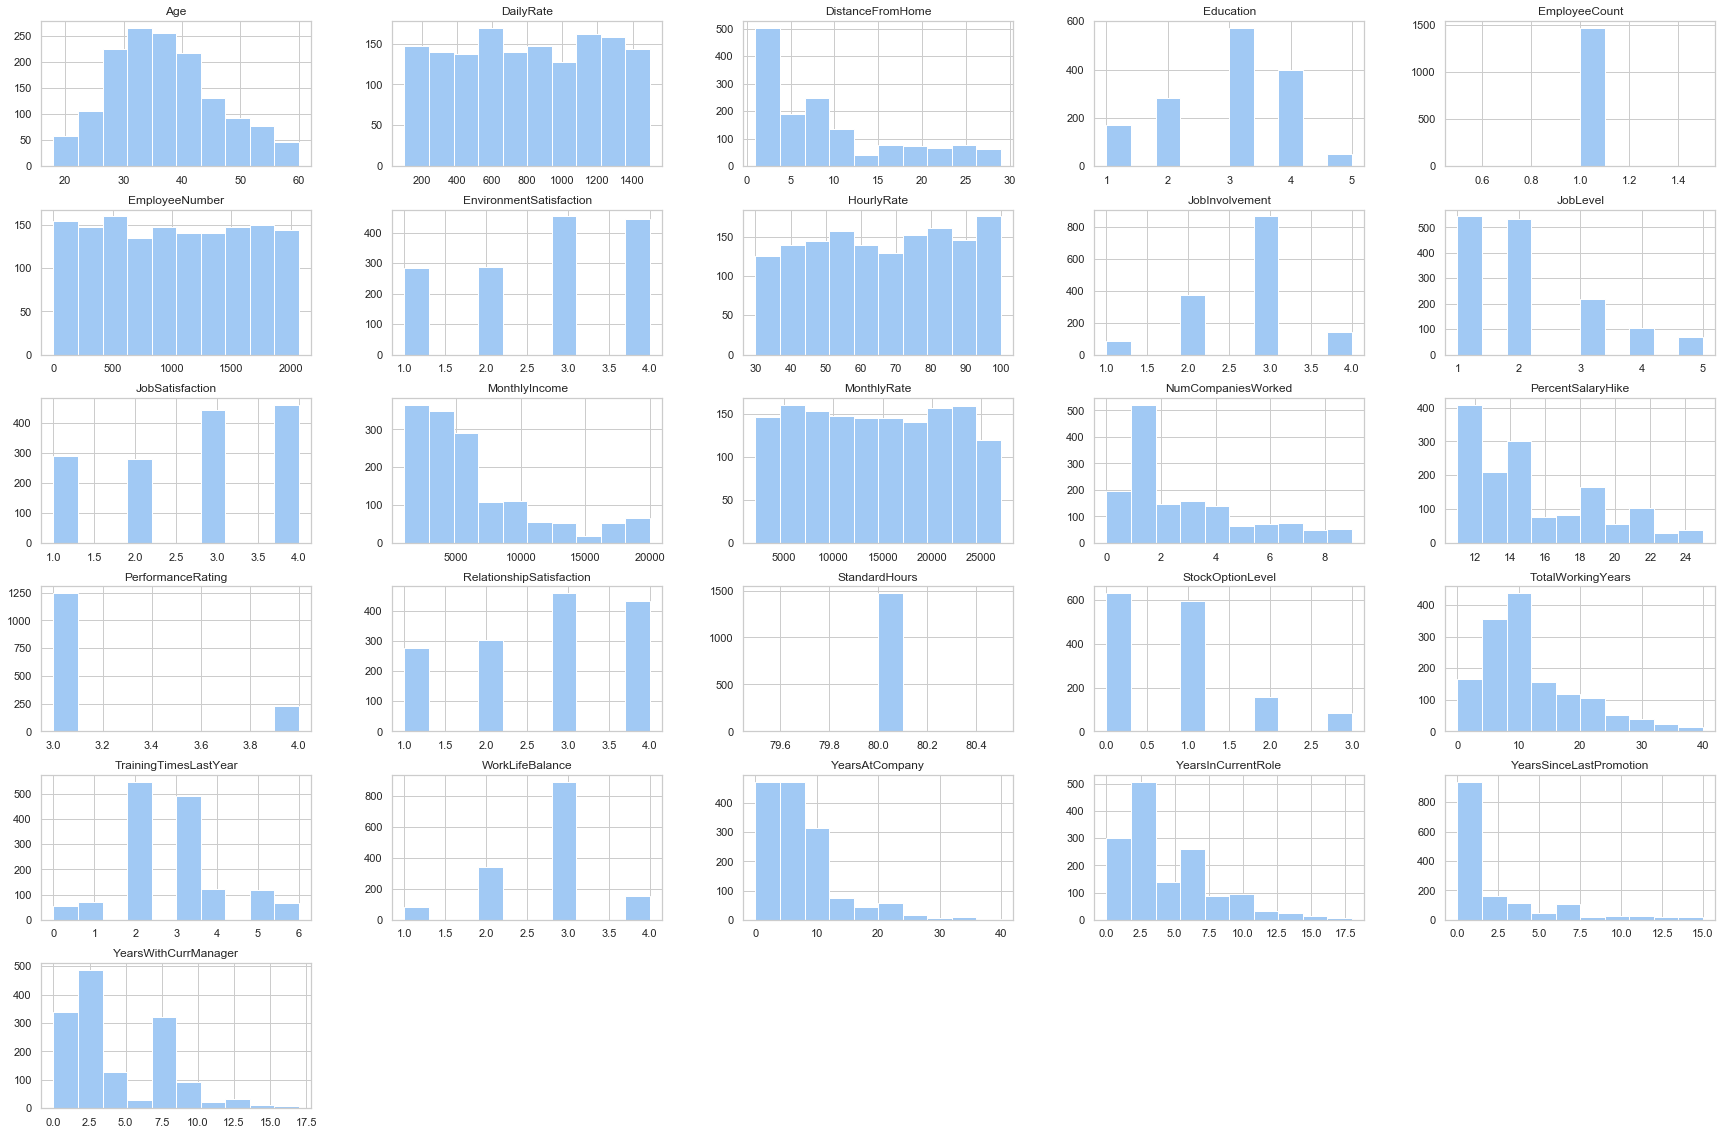

In [412]:
dataset.hist(figsize=(30,20))

We will drop two columns: employee count and StandardHours.

In [413]:
dataset = dataset.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)


In [414]:
numeric_columns = dataset.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [415]:
def plot_distribution(var_select): 
   
    fig = plt.figure(figsize=(10,5))
    sns.countplot(x=var_select, hue=dataset['Attrition'], palette="pastel")
    plt.legend()
    plt.show()
   

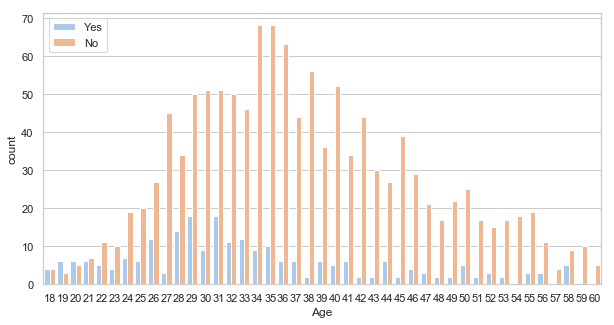

In [416]:
plot_distribution(dataset['Age'])

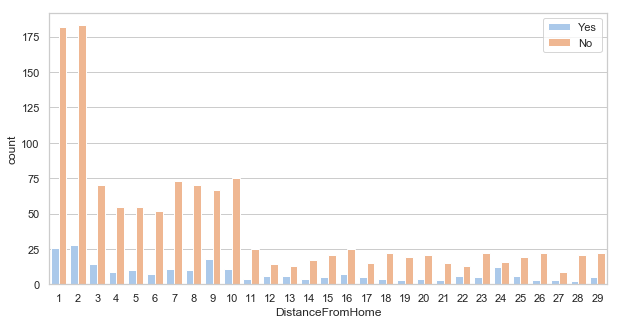

In [417]:
plot_distribution(dataset['DistanceFromHome'])


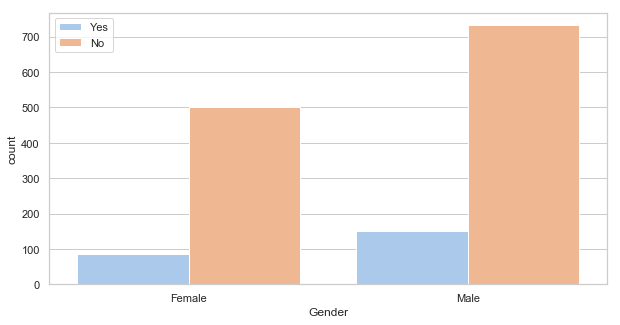

In [418]:
plot_distribution(dataset['Gender'])

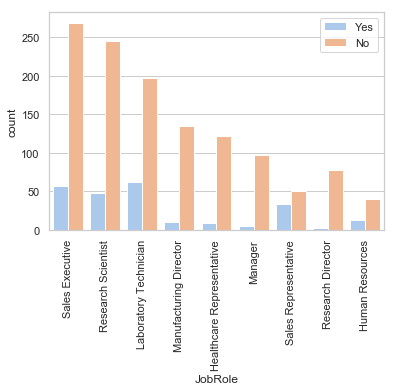

In [333]:
sns.set(style="whitegrid", palette="pastel")
g = sns.countplot(x=dataset['JobRole'], hue=dataset['Attrition'], palette="pastel")
plt.legend()
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

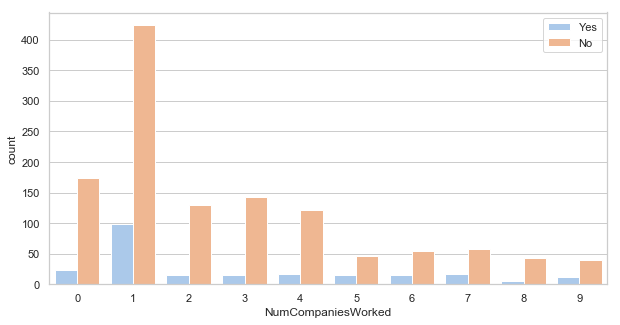

In [334]:
plot_distribution(dataset['NumCompaniesWorked'])

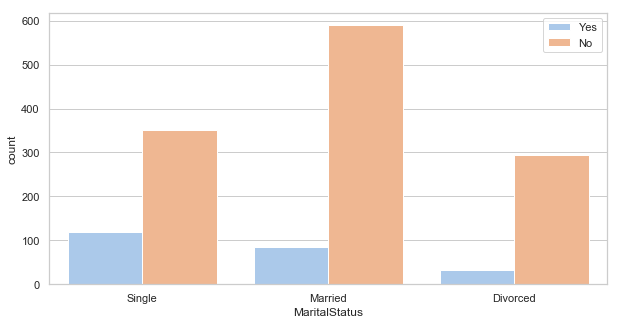

In [335]:
plot_distribution(dataset['MaritalStatus'])

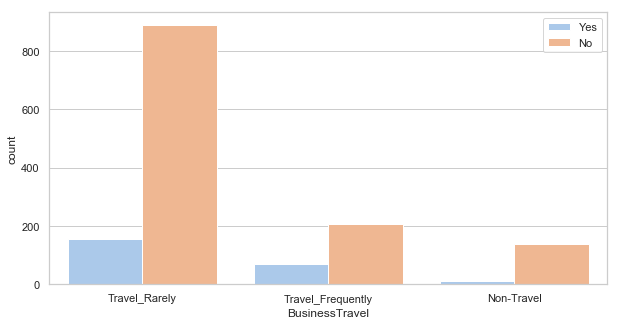

In [336]:
plot_distribution(dataset['BusinessTravel'])

In [337]:
#dataset.groupby('DistanceFromHome')['Attrition_numerical'].mean().plot(kind = 'bar')

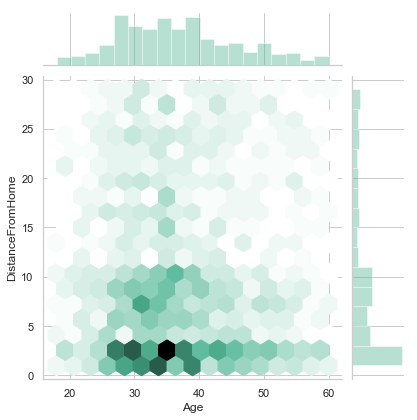

In [339]:
sns.jointplot(x="Age", y="DistanceFromHome", data = dataset, kind="hex", color="#4CB391");

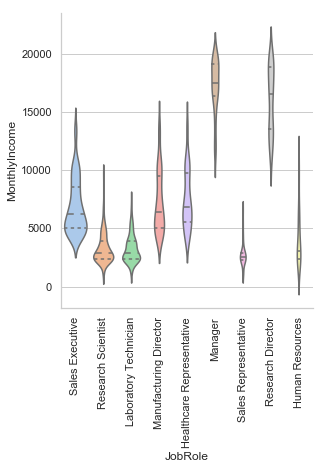

In [340]:
sns.set(style="whitegrid", palette="pastel")
g = sns.catplot(x="JobRole", y="MonthlyIncome",
            kind="violin",scale='count', inner='quartile', data=dataset);
plt.title('')

g.set_xticklabels(rotation=90)

In [341]:
def plot_cat(var_select): 
   
    sns.set(style="whitegrid", palette="pastel")
    g = sns.catplot(x=var_select, y="MonthlyIncome", hue="Attrition", kind="swarm", palette="pastel", data=dataset);
    plt.title('')

    g.set_xticklabels(rotation=90)
    plt.show()



In [342]:
cat_list = ['JobLevel', 'JobRole', 'JobSatisfaction', 'OverTime']

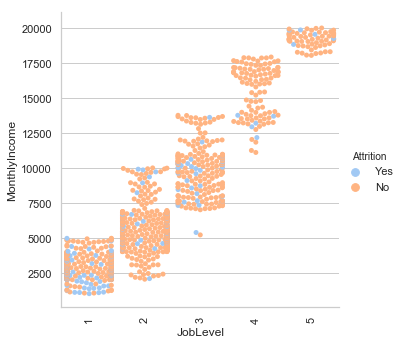

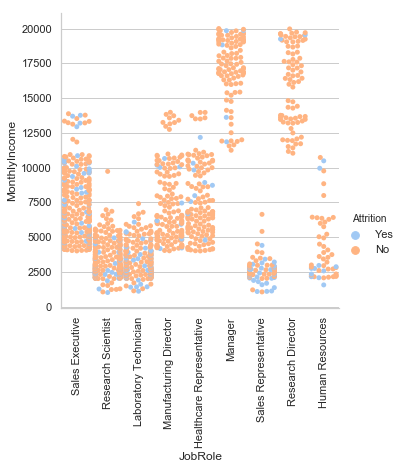

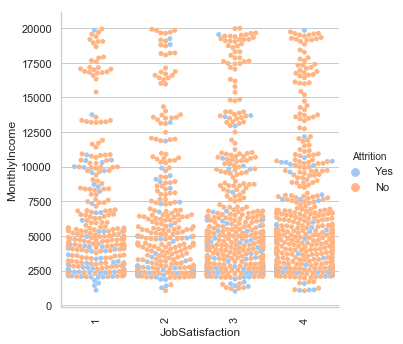

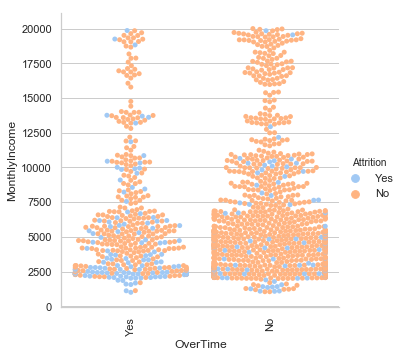

In [343]:
for i in cat_list:
    plot_cat(i)

# Feature selection

#### Target Feature

Target Feature - Attrition

In [344]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
dataset["Attrition_numerical"] = dataset["Attrition"].apply(lambda x: target_map[x])

## Create correlation matrix for features

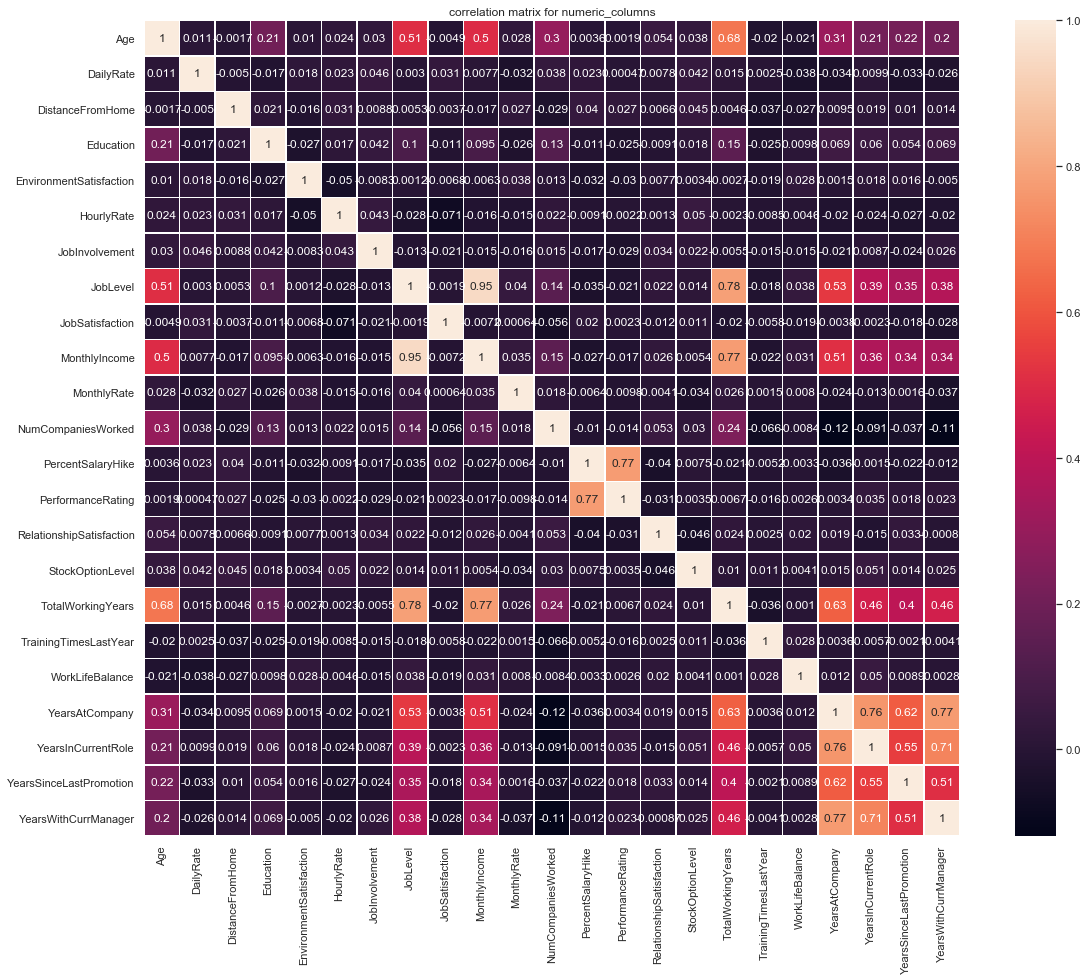

In [345]:
plt.figure(figsize=(20,15))
sns.heatmap(dataset[numeric_columns].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix for numeric_columns")
plt.show()

In [346]:
dataset[numeric_columns].corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


# Encoding

In [347]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'country'. 
dataset['BusinessTravel'] = label_encoder.fit_transform(dataset['BusinessTravel']) 
dataset['Department'] = label_encoder.fit_transform(dataset['Department'])
dataset['EducationField'] = label_encoder.fit_transform(dataset['EducationField'])
dataset['JobRole'] = label_encoder.fit_transform(dataset['JobRole'])

In [348]:
# one-hot encoding the Grade variable: 
dataset["Gender"] = pd.get_dummies(dataset["Gender"], prefix="Gender", drop_first=True)
dataset["MaritalStatus"] = pd.get_dummies(dataset["MaritalStatus"],prefix="MaritalStatus", drop_first=True)
dataset["OverTime"] = pd.get_dummies(dataset["OverTime"],prefix="OverTime", drop_first=True)
dataset["Attrition"] = pd.get_dummies(dataset["Attrition"],prefix="Attrition", drop_first=True)

In [349]:
dataset = dataset.drop(['Attrition'], axis=1)


In [350]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null int64
DailyRate                   1470 non-null int64
Department                  1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null uint8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int64
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null uint8
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime                    1

In [351]:
# checking if a pandas dataframe contains only numeric columns
dataset.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

Age                         True
BusinessTravel              True
DailyRate                   True
Department                  True
DistanceFromHome            True
Education                   True
EducationField              True
EnvironmentSatisfaction     True
Gender                      True
HourlyRate                  True
JobInvolvement              True
JobLevel                    True
JobRole                     True
JobSatisfaction             True
MaritalStatus               True
MonthlyIncome               True
MonthlyRate                 True
NumCompaniesWorked          True
OverTime                    True
PercentSalaryHike           True
PerformanceRating           True
RelationshipSatisfaction    True
StockOptionLevel            True
TotalWorkingYears           True
TrainingTimesLastYear       True
WorkLifeBalance             True
YearsAtCompany              True
YearsInCurrentRole          True
YearsSinceLastPromotion     True
YearsWithCurrManager        True
Attrition_

# PCA

In [352]:
# Y is the target variable
Y = dataset['Attrition_numerical']
# X is the feature set
X = dataset.drop(['Attrition_numerical'], axis=1)


In [353]:

X_std = StandardScaler().fit_transform(X)


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [354]:
X_std = pd.DataFrame(X_std, columns = X.columns)

In [355]:
X_std

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227
5,-0.539166,-0.913194,0.502054,-0.493817,-0.887515,-0.891688,-0.937414,1.169781,0.816497,0.645041,...,-0.426230,0.266233,-0.932014,-0.421642,-0.620189,-1.077862,-0.001333,0.764998,0.252146,0.526188
6,2.417384,0.590048,1.292887,-0.493817,-0.764121,0.085049,0.565311,0.254625,-1.224745,0.743454,...,2.346151,-1.584178,2.589994,0.092620,0.155707,-1.077862,-0.981014,-1.167687,-0.679146,-1.155935
7,-0.758170,0.590048,1.377177,-0.493817,1.827158,-1.868426,-0.937414,1.169781,0.816497,0.054562,...,2.346151,-0.658973,0.241988,-1.321601,-0.620189,0.338096,-0.981014,-1.167687,-0.679146,-1.155935
8,0.117845,-0.913194,-1.453958,-0.493817,1.703764,0.085049,-0.937414,1.169781,0.816497,-1.077188,...,2.346151,-0.658973,-0.932014,-0.164511,-0.620189,0.338096,0.325228,0.764998,-0.368715,1.086895
9,-0.101159,0.590048,1.230910,-0.493817,2.197341,0.085049,0.565311,0.254625,0.816497,1.383138,...,-0.426230,-0.658973,1.415991,0.735447,0.155707,-1.077862,-0.001333,0.764998,1.493867,0.806541


Text(0, 0.5, 'Cumulative explained variance')

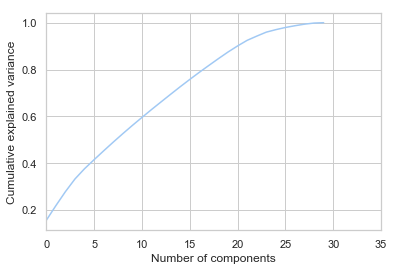

In [356]:

pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,35,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

The above plot shows almost 90% variance by the first 23 components. Therfore we can drop rest components.

In [357]:

pca = PCA(n_components=23)
X_PCA = pca.fit_transform(X_std)
pca_var = pca.explained_variance_ratio_
print('Explained variance ratio: ', pca.explained_variance_ratio_.sum())


Explained variance ratio:  0.9425803651003609


In [358]:
X_PCA = pd.DataFrame(X_PCA)

In [359]:
#df = pd.DataFrame(pca.components_,columns=X_std.columns)

In [360]:
X_PCA

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.371068,0.961334,-1.313265,-1.947206,0.058930,1.874198,-0.975423,-0.590500,-0.929698,3.378198,...,0.669559,-2.045765,-0.938524,-0.254880,1.160207,-0.622559,1.077851,1.382843,-1.067037,-0.296831
1,0.604057,-1.627164,2.848083,-0.308392,-0.669792,0.294314,0.116704,0.687453,-0.938275,-1.634594,...,0.321558,-0.769770,1.775803,-0.184760,-0.072222,-0.519034,0.189681,-0.369601,-0.488453,-1.964171
2,-2.448743,1.639177,0.153816,0.550252,-0.683556,0.067650,1.635481,-0.922947,1.542808,0.649758,...,1.127867,-0.578857,-1.518719,1.590980,0.041671,-0.094455,-0.018959,0.660573,-1.301700,0.047912
3,-0.830345,-0.223994,-1.211320,0.298347,-0.220964,1.609757,0.631496,-0.712182,-0.123494,0.037333,...,0.549525,-0.605218,-0.600208,-0.093973,-0.011337,-0.156853,-1.326408,-1.697156,-0.847724,0.252900
4,-1.816613,1.321446,-0.366554,1.116362,0.127789,-1.028336,0.498404,0.313213,0.515984,-0.440463,...,0.341082,0.162365,1.807074,-2.367062,0.500657,-0.919299,0.048657,1.546202,-1.643815,0.773814
5,-0.602408,-0.877359,-0.507088,2.179576,-0.967135,0.993502,-0.977704,0.236685,1.142206,0.887012,...,-0.042140,-1.685983,-0.205002,0.826194,-0.337168,-0.134004,1.082717,-0.381417,-0.031122,-0.327743
6,-1.180143,1.820581,3.298121,-0.599998,3.146114,0.094757,1.713680,-1.647258,-0.127010,1.075519,...,0.508286,-0.569452,0.500557,0.546884,1.547290,1.385713,-0.552858,0.662638,0.199468,-1.019239
7,-2.946518,-0.625007,3.181654,0.384751,-0.070952,1.010420,0.503786,-0.029733,0.212539,0.136395,...,-1.527248,-0.803038,-0.749911,0.153448,-2.216048,0.814299,0.417345,0.868047,0.312175,0.128562
8,1.053911,-1.678157,2.598652,0.055909,-1.815483,0.672097,-0.963327,0.938018,-0.498180,-0.984545,...,-0.805596,0.390727,-0.009255,0.541069,-1.518586,1.324007,0.552939,-0.501796,0.447907,-0.633802
9,1.304262,0.747257,0.260983,1.827451,2.616329,0.526714,0.060185,-0.396840,-0.134826,-0.101718,...,-1.484800,-0.275710,0.012586,0.682197,-0.541988,-1.047116,0.356618,0.980303,-1.003004,1.044917


# Baseline Modeling

### Split into Training and Testing Sets

In [361]:
X_PCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
0     1470 non-null float64
1     1470 non-null float64
2     1470 non-null float64
3     1470 non-null float64
4     1470 non-null float64
5     1470 non-null float64
6     1470 non-null float64
7     1470 non-null float64
8     1470 non-null float64
9     1470 non-null float64
10    1470 non-null float64
11    1470 non-null float64
12    1470 non-null float64
13    1470 non-null float64
14    1470 non-null float64
15    1470 non-null float64
16    1470 non-null float64
17    1470 non-null float64
18    1470 non-null float64
19    1470 non-null float64
20    1470 non-null float64
21    1470 non-null float64
22    1470 non-null float64
dtypes: float64(23)
memory usage: 264.2 KB


In [362]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_PCA, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1176
The number of observations in test set is 294


In [391]:
def print_result(model, X_test, y_test):
    
    y_pred = model.predict(X_test) #prediction
    train_score = model.score(X_train,y_train)
   
    accuracy = metrics.accuracy_score(y_test, y_pred)
     
    
    conf_mat = metrics.confusion_matrix(y_test, y_pred)
    conf_mat_df = pd.DataFrame(conf_mat, 
                               index= ['true_no', 'true_yes'],
                              columns = ['predict_no', 'predict_yes'])   
    print('train_score:%.3f'%train_score)
    
    print('accuracy:%.3f'%accuracy)
    print('Confusion Matrix:', end='\n')
    print(conf_mat_df, end='\n\n')
    
    


- 1) We are going to **fit** our model on the *training* data. 
- 2) Then we are going to test our model by having it **predict** y values for our *X_test* data. 
- 3) We can then **evaluate** how well our model performed by seeing how far off the *predicted* y values were from the *actual* y values.

## 1. Logistic Regression Classifier

In [364]:
lr_params = {
    'max_iter': 1000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': .6
}


In [365]:
#lr_tuned_params = {'penalty': 'l2', 'C': .6}
lr = LogisticRegression(**lr_params)
lr.fit(X_train, y_train)
print_result(lr, X_test, y_test)

train_score:0.751
test_score:0.752
accuracy:0.752
Confusion Matrix:
          predict_no  predict_yes
true_no          179           62
true_yes          11           42



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [393]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
             'penalty': ['l1', 'l2']}

CV_rfc = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

{'C': 0.01, 'penalty': 'l2'}


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [394]:
lr_params = {
    'max_iter': 1000,
    'class_weight': 'balanced',
    'penalty': 'l2', 'C': 0.01
}
lr = LogisticRegression(**lr_params)
lr.fit(X_train, y_train)
print_result(lr, X_test, y_test)

train_score:0.722
accuracy:0.728
Confusion Matrix:
          predict_no  predict_yes
true_no          171           70
true_yes          10           43



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 2. KNN 

In [368]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)

train_score:0.867
test_score:0.823
accuracy:0.823
Confusion Matrix:
          predict_no  predict_yes
true_no          236            5
true_yes          47            6



In [369]:
param_grid = {'n_neighbors':[3, 5, 7, 9, 15], 
                'weights':['uniform', 'distance'],
              
               }

CV_rfc = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'n_neighbors': 7, 'weights': 'uniform'}


In [370]:
knn = KNeighborsClassifier(n_neighbors=7, weights = 'uniform')
knn.fit(X_train,y_train)

print_result(knn, X_test, y_test)
score = cross_val_score(knn, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())

train_score:0.866
test_score:0.823
accuracy:0.823
Confusion Matrix:
          predict_no  predict_yes
true_no          237            4
true_yes          48            5

Cross validation Score is  0.8486412557200195


## 3. Decision Tree

In [371]:
# timing
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=20,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X_train, y_train, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(decision_tree, X_test, y_test)

Cross validation Score is  0.7610675908781591
--- 0.0797121524810791 seconds ---
train_score:1.000
test_score:0.772
accuracy:0.772
Confusion Matrix:
          predict_no  predict_yes
true_no          207           34
true_yes          33           20



In [372]:
param_grid = {'max_depth':[3, 5, 7, 9, 15, 20]}

CV_rfc = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'max_depth': 5}


In [395]:
start_time = time.time()
# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=1,
    max_depth=5,
    random_state = 1337
)
decision_tree.fit(X_train,y_train)

#Cross-validate using 10 folds.
score = cross_val_score(decision_tree, X_train, y_train, cv=10)

print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(decision_tree, X_test, y_test)

Cross validation Score is  0.8325171007125144
--- 0.06366491317749023 seconds ---
train_score:0.867
accuracy:0.779
Confusion Matrix:
          predict_no  predict_yes
true_no          227           14
true_yes          51            2



## 4. Random Forest

In [374]:
# timing
start_time = time.time()


rfc = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1)

# Train the classifier
rfc.fit(X_train,y_train)

score = cross_val_score(rfc, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(rfc, X_test, y_test)

Cross validation Score is  0.8529504891917654
--- 23.992820978164673 seconds ---
train_score:1.000
test_score:0.820
accuracy:0.820
Confusion Matrix:
          predict_no  predict_yes
true_no          240            1
true_yes          52            1



In [375]:
param_grid = {'bootstrap': [True],
    'max_depth': [3, 5, 7, 15, 20],
    'max_features': [2, 3],
    }

CV_rfc = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

{'bootstrap': True, 'max_depth': 20, 'max_features': 2}


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

In [396]:
# timing
start_time = time.time()


rfc = ensemble.RandomForestClassifier(n_estimators = 1000, random_state = 0, n_jobs = -1, bootstrap = True,
    max_depth = 20, max_features = 2)

# Train the classifier
rfc.fit(X_train,y_train)

score = cross_val_score(rfc, X_train,y_train, cv=10)
print('Cross validation Score is ', score.mean())
print("--- %s seconds ---" % (time.time() - start_time))
print_result(rfc, X_test, y_test)

Cross validation Score is  0.8486554987053492
--- 20.51873207092285 seconds ---
train_score:1.000
accuracy:0.820
Confusion Matrix:
          predict_no  predict_yes
true_no          241            0
true_yes          53            0



The score cross validation reports is the accuracy of the tree. Here we're about 98% accurate. Accuracy is how close a measured value is to the actual (true) value

## 5. Gradient Boosting

In [377]:
params = {'n_estimators': 100,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

train_score:0.914
test_score:0.833
accuracy:0.833
Confusion Matrix:
          predict_no  predict_yes
true_no          235            6
true_yes          43           10



In [378]:
param_grid = {'n_estimators':[40, 60, 80, 100], 
                'learning_rate':[0.001, 0.05, 0.1, 0.2],
               'max_depth':[2, 3, 4, 6, 8],
               }

CV_rfc = GridSearchCV(estimator=ensemble.GradientBoostingClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


Second try with the best parametrs:

In [397]:
params = {'n_estimators': 100,
          'max_depth': 3,
          'learning_rate': 0.1,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

print_result(clf, X_test, y_test)

train_score:0.963
accuracy:0.850
Confusion Matrix:
          predict_no  predict_yes
true_no          235            6
true_yes          38           15



## 6. Naive Bayes

In [380]:
from sklearn.naive_bayes import BernoulliNB
bnb_n = BernoulliNB()
# Fit our model to the data.
bnb_n.fit(X_train, y_train)
print_result(bnb_n, X_test, y_test)

train_score:0.861
test_score:0.827
accuracy:0.827
Confusion Matrix:
          predict_no  predict_yes
true_no          236            5
true_yes          46            7



In [381]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print_result(gnb, X_test, y_test)

train_score:0.880
test_score:0.840
accuracy:0.840
Confusion Matrix:
          predict_no  predict_yes
true_no          234            7
true_yes          40           13



Logistic Regression Classifier, KNN,  Decision Tree, Random Forest, Gradient Boosting, XG Boosting

In [382]:

print('Logistic Regression Classifier\n')
print_result(lr, X_test, y_test)
print('KNN\n')
print_result(knn, X_test, y_test)
print('Decision Tree\n')
print_result(decision_tree, X_test, y_test)
print('Random Forest\n')
print_result(rfc, X_test, y_test) 
print('Gradient Boosting\n')        
print_result(clf, X_test, y_test)
print('GaussianNB\n')    
print_result(gnb, X_test, y_test)


Logistic Regression Classifier

train_score:0.722
test_score:0.728
accuracy:0.728
Confusion Matrix:
          predict_no  predict_yes
true_no          171           70
true_yes          10           43

KNN

train_score:0.866
test_score:0.823
accuracy:0.823
Confusion Matrix:
          predict_no  predict_yes
true_no          237            4
true_yes          48            5

Decision Tree

train_score:0.846
test_score:0.796
accuracy:0.796
Confusion Matrix:
          predict_no  predict_yes
true_no          226           15
true_yes          45            8

Random Forest

train_score:0.851
test_score:0.820
accuracy:0.820
Confusion Matrix:
          predict_no  predict_yes
true_no          241            0
true_yes          53            0

Gradient Boosting

train_score:0.953
test_score:0.854
accuracy:0.854
Confusion Matrix:
          predict_no  predict_yes
true_no          236            5
true_yes          38           15

GaussianNB

train_score:0.880
test_score:0.840
accuracy:0.8

Logistic Regression Classifier, Random Forest, Gradient Boosting

# Feature Importance

- lr: is the fitted logistic regression and winning model 
- list_of_feat: list of features (max coef) for each component  

In [383]:
def best_feature(n):
    pca.components_[n]
    num = list((pca.components_[n]))
    norm_num = []
    for i in num:
        i = i*1000
    
        norm_num.append(i)
    names = list(X_std.columns)
    mapped = list(zip(names, norm_num))
    result = pd.DataFrame(mapped, columns = ['names', 'norm_num'])
    itogo = result.sort_values(by = 'norm_num', ascending = False)
    
    return itogo

In [384]:
list_of_feat = []
for i in range(0,23):
    
    abc = best_feature(i)
    
    
        
    name = abc['names'].loc[abc['norm_num'].idxmax()]
    list_of_feat.append(name)
list_of_feat


['TotalWorkingYears',
 'NumCompaniesWorked',
 'PerformanceRating',
 'YearsWithCurrManager',
 'MaritalStatus',
 'OverTime',
 'EducationField',
 'JobSatisfaction',
 'DailyRate',
 'BusinessTravel',
 'TrainingTimesLastYear',
 'Gender',
 'EducationField',
 'RelationshipSatisfaction',
 'DistanceFromHome',
 'RelationshipSatisfaction',
 'TrainingTimesLastYear',
 'EducationField',
 'JobInvolvement',
 'JobSatisfaction',
 'StockOptionLevel',
 'StockOptionLevel',
 'YearsSinceLastPromotion']

In [385]:
coefs= lr.coef_
df_lr_feature_importance=pd.DataFrame() 

coefs

array([[-0.23351705, -0.03304756, -0.07103274, -0.11319191, -0.14161824,
         0.18642284, -0.05327898, -0.16546507, -0.2546925 ,  0.05755551,
        -0.03005553,  0.1397004 ,  0.35639997,  0.136694  ,  0.09937934,
         0.00692646, -0.07713922,  0.13277599, -0.04878338, -0.27837593,
         0.08428802, -0.25969795,  0.2303251 ]])

In [386]:
coefs1 = []
for i in coefs[0]:
    coefs1.append(i)

In [387]:
coefs1

[-0.23351704778882074,
 -0.03304756023458901,
 -0.07103274159198116,
 -0.11319191285865053,
 -0.1416182444714812,
 0.18642284032625966,
 -0.053278983766931826,
 -0.16546506563230248,
 -0.2546925034344437,
 0.05755550872937129,
 -0.030055526290924065,
 0.13970039975409684,
 0.35639996731451123,
 0.13669400353063374,
 0.09937934433635474,
 0.006926457809223506,
 -0.0771392208635684,
 0.13277599387485323,
 -0.04878338359449282,
 -0.2783759328513836,
 0.08428801883242745,
 -0.2596979517120467,
 0.2303250964573422]

In [388]:
df_lr_feature_importance=pd.DataFrame() 
df_lr_feature_importance['feature'] = list_of_feat
df_lr_feature_importance['importance']=coefs1

In [389]:
df_lr_feature_importance

,feature,importance
0,TotalWorkingYears,-0.233517
1,NumCompaniesWorked,-0.033048
2,PerformanceRating,-0.071033
3,YearsWithCurrManager,-0.113192
4,MaritalStatus,-0.141618
5,OverTime,0.186423
6,EducationField,-0.053279
7,JobSatisfaction,-0.165465
8,DailyRate,-0.254693
9,BusinessTravel,0.057556


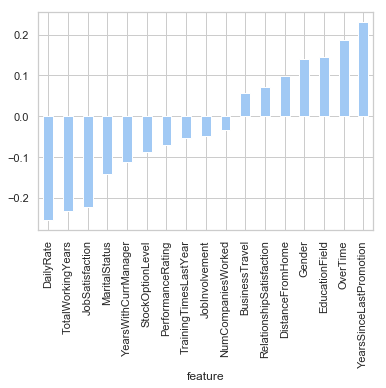

In [390]:
df_lr_feature_importance.sort_values(by ='importance', ascending=False, inplace=True)
df_lr_feature_importance.groupby('feature').importance.mean().sort_values().plot(kind='bar')

That's not direct feature. Max feature for this component.

# CONCLUSION

We have constructed a very simple pipeline of predicting employee attrition, from some basic Exploratory Data Analysis to feature engineering as well as implementing several learning models.


- Several *working environment* factors were associated with higher attrition risks: such as working overtime, living far away from the company, lack of satisfaction, and traveling a lot.
- Some *job roles*, such as sales, HR, research scientists and laboratory technician had higher attrition risks; 
- Also, employees in *junior level* positions were more likely to leave their jobs.
- Some personal attributes also contributed to the attrition risks, such as single, young age, and a history of short stays at each worked company.


### Future Ideas

- For employees who have been working overtime and traveling a lot - give compensation or time off
- Provide more team and culture building 
- Additional attention (like mentorship) to junior employees
- Stress relieve like massage, gym or game room
